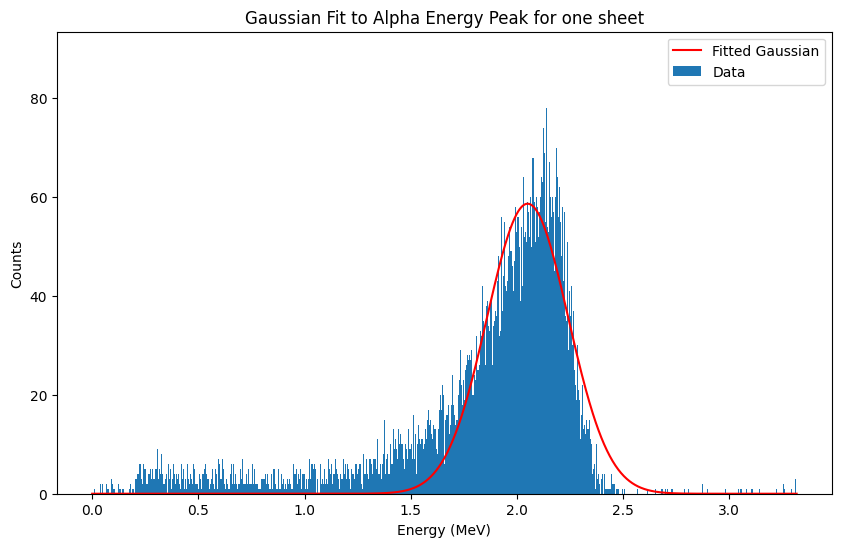

Fitted parameters for one sheet: A = 58.662716999996185, sigma = 0.19151803452082963, mu = 2.050624650603661


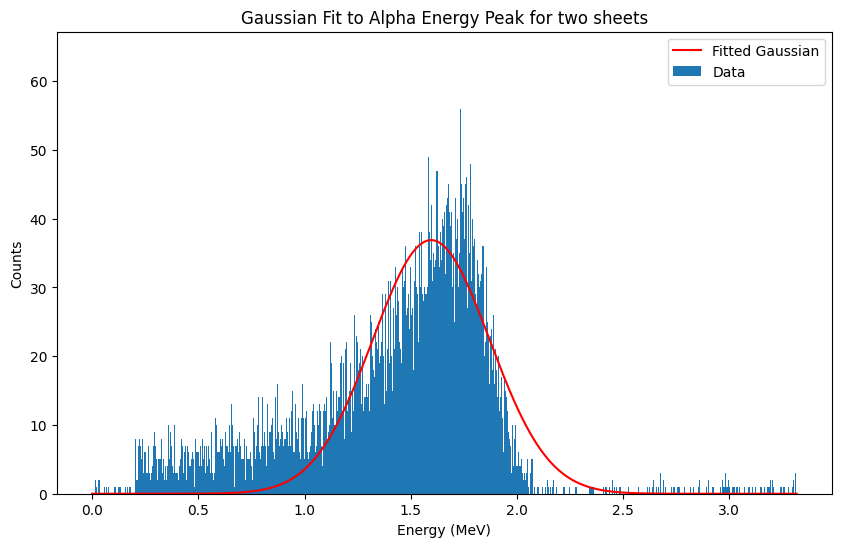

Fitted parameters for two sheets: A = 36.89084147964367, sigma = 0.2754930586143809, mu = 1.5964125440751895


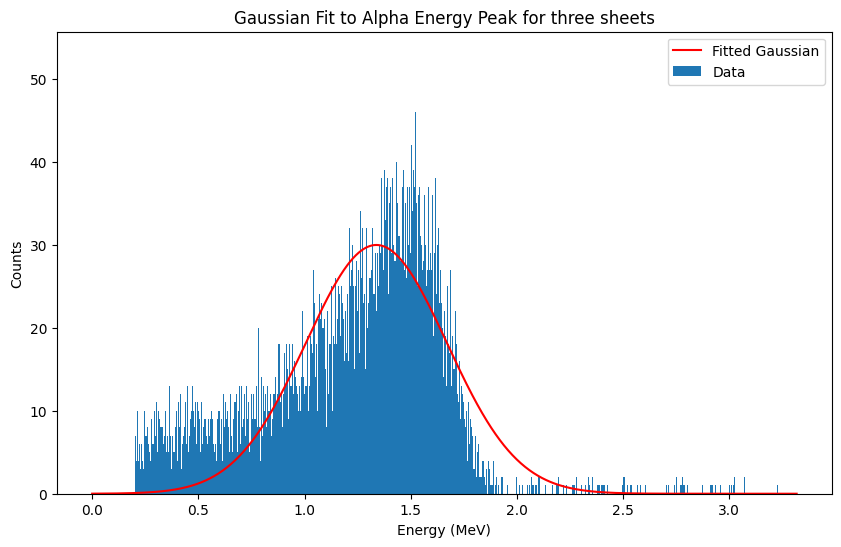

Fitted parameters for three sheets: A = 29.963681455830507, sigma = 0.33198229729473083, mu = 1.3383691257914254


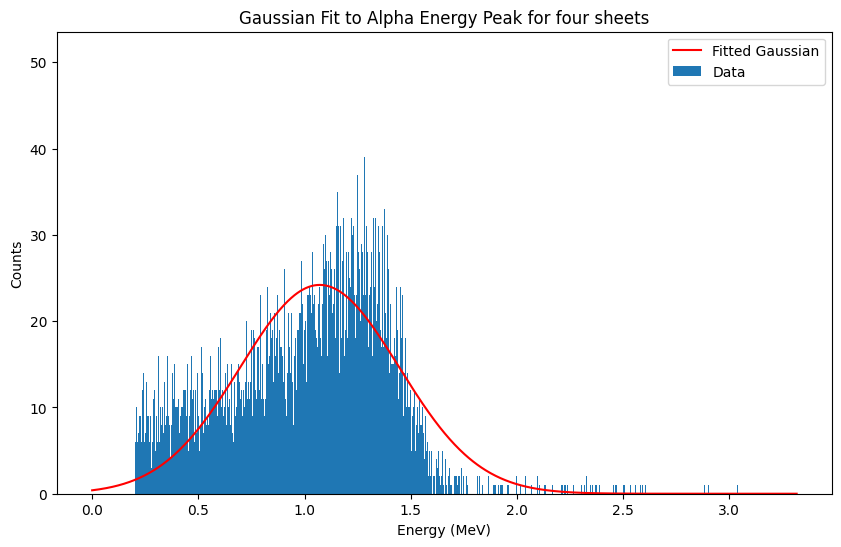

Fitted parameters for four sheets: A = 24.20387695213465, sigma = 0.37362872474885495, mu = 1.0716603010817007


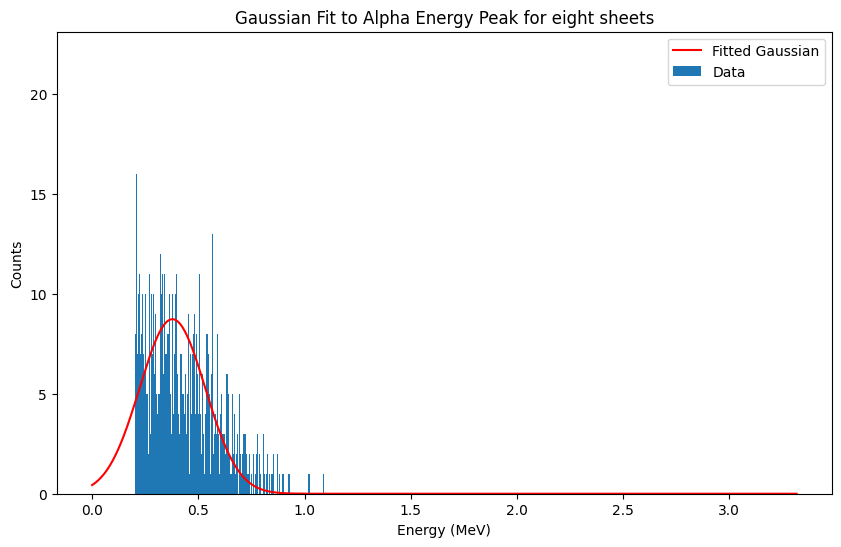

Fitted parameters for eight sheets: A = 8.726844298451196, sigma = 0.15426999699976673, mu = 0.3779800656684155


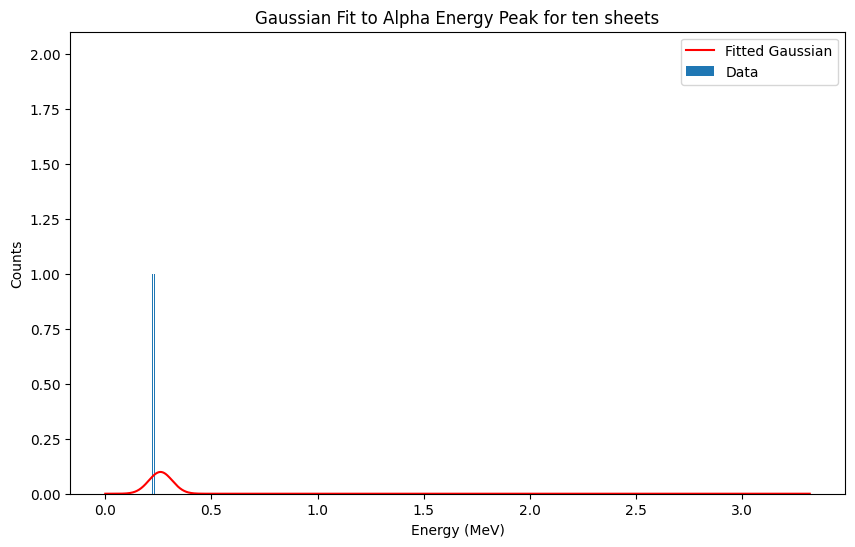

Fitted parameters for ten sheets: A = 0.09900101072335943, sigma = 0.05509628627179675, mu = 0.26003459723801237


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Function to read CSV file and skip the first 6 rows
def read_csv(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=6)

# Read each CSV file into a numpy array
one_sheet_data = read_csv('./data/mylar3.csv')     # 1 sheet
two_sheets_data = read_csv('./data/mylar2.csv')    # 2 sheets
three_sheets_data = read_csv('./data/mylar1.csv')  # 3 sheets
four_sheets_data = read_csv('./data/mylar4.csv')   # 4 sheets
eight_sheets_data = read_csv('./data/mylar6.csv')  # 8 sheets
ten_plus_sheets_data = read_csv('./data/mylar5.csv')  # 10+ sheets

# Given constants
channels = 16384
voltage = 1.15  # in Volts

# Calculate voltage per channel
voltage_per_channel = voltage / channels

# Conversion factors
G1 = 0.264  # C/J
G2 = 8.196 * 10**12  # V/C
v_to_j = (G1 * G2)**-1  # in J/V
j_to_ev = 6.242 * 10**12  # MeV/J

# Function to convert channel number to energy in eV
def channel_to_ev(channel_number):
    voltage = channel_number * voltage_per_channel
    energy_joules = voltage * v_to_j
    energy_ev = energy_joules * j_to_ev
    return energy_ev

# Gaussian function
def gaussian(x, A, sigma, mu):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Function to plot data and fit Gaussian
def data_plotter(data, name):
    channel_numbers = data[:, 0]
    counts = data[:, 1]

    # Remove NaN and inf values
    valid_indices = np.isfinite(counts)
    channel_numbers = channel_numbers[valid_indices]
    counts = counts[valid_indices]

    # Convert channel numbers to energy in eV
    energies_ev = np.array([channel_to_ev(ch) for ch in channel_numbers])

    # Initial guesses for the parameters
    initial_guess = [50, 0.075, energies_ev[np.argmax(counts)]]

    # Fit the Gaussian function to the data with bounds
    popt, pcov = curve_fit(gaussian, energies_ev, counts, p0=initial_guess)

    # Generate a finer grid of energy values for plotting the fit
    energy_grid = np.linspace(min(energies_ev), max(energies_ev), 1000)

    # Plot the data and the fitted Gaussian
    plt.figure(figsize=(10, 6))
    plt.bar(energies_ev, counts, label='Data', width=(max(energies_ev) - min(energies_ev)) / len(energies_ev))
    plt.plot(energy_grid, gaussian(energy_grid, popt[0], popt[1], popt[2]), label='Fitted Gaussian', color='red')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Counts')
    plt.title(f'Gaussian Fit to Alpha Energy Peak for {name}')
    plt.legend()
    # plt.savefig(f'{name}.png')
    plt.show()

    # Print the fitted parameters
    print(f"Fitted parameters for {name}: A = {popt[0]}, sigma = {popt[1]}, mu = {popt[2]}")

# Plot histograms and fit Gaussian for each dataset
data_plotter(one_sheet_data, 'one sheet')
data_plotter(two_sheets_data, 'two sheets')
data_plotter(three_sheets_data, 'three sheets')
data_plotter(four_sheets_data, 'four sheets')
data_plotter(eight_sheets_data, 'eight sheets')
data_plotter(ten_plus_sheets_data, 'ten sheets')


Mylar Thickness: 0.000002 m, Peak Energy: 2.0500 MeV
Mylar Thickness: 0.000005 m, Peak Energy: 1.5900 MeV
Mylar Thickness: 0.000007 m, Peak Energy: 1.3400 MeV
Mylar Thickness: 0.000010 m, Peak Energy: 1.0700 MeV
Mylar Thickness: 0.000020 m, Peak Energy: 0.3800 MeV
Mylar Thickness: 0.000025 m, Peak Energy: 0.0260 MeV


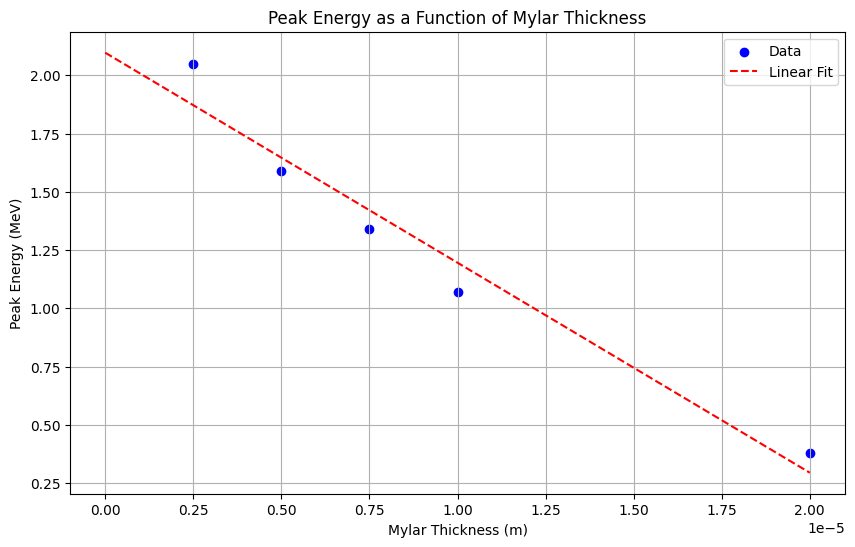

Extrapolated peak energy at 0 thickness: 2.0970 MeV
Thickness: 2.4999999999999998e-06 um, Mass Thickness: 0.0000 g/cm^2, Mass Stopping Power: 184000.0000 MeV cm^2/g
Thickness: 4.9999999999999996e-06 um, Mass Thickness: 0.0000 g/cm^2, Mass Stopping Power: 100000.0000 MeV cm^2/g
Thickness: 7.499999999999999e-06 um, Mass Thickness: 0.0000 g/cm^2, Mass Stopping Power: 108000.0000 MeV cm^2/g
Thickness: 9.999999999999999e-06 um, Mass Thickness: 0.0000 g/cm^2, Mass Stopping Power: 69000.0000 MeV cm^2/g
Comparison of Calculated and Interpolated Mass Stopping Power Values:
Thickness: 2.4999999999999998e-06 um, Calculated: 184000.0000 MeV cm^2/g, Interpolated: 1460.0000 MeV cm^2/g
Thickness: 4.9999999999999996e-06 um, Calculated: 100000.0000 MeV cm^2/g, Interpolated: 1683.2000 MeV cm^2/g
Thickness: 7.499999999999999e-06 um, Calculated: 108000.0000 MeV cm^2/g, Interpolated: 1826.0000 MeV cm^2/g
Thickness: 9.999999999999999e-06 um, Calculated: 69000.0000 MeV cm^2/g, Interpolated: 1980.8000 MeV cm^

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import interp1d

# Provided peak energy values in MeV
peak_energies_mev = np.array([2.05, 1.59, 1.34, 1.07, 0.38, 0.026])

# Mylar thicknesses in micrometers
thicknesses = np.array([2.5, 5.0, 7.5, 10.0, 20.0, 25.0])
thicknesses = thicknesses * 10.0**-6  # Convert to meters

# Print peak energies in a nicer format
for thickness, energy in zip(thicknesses, peak_energies_mev):
    print(f"Mylar Thickness: {thickness:.6f} m, Peak Energy: {energy:.4f} MeV")

# Perform linear regression to fit a line to the peak energy vs. Mylar thickness data
slope, intercept, r_value, p_value, std_err = linregress(thicknesses[:-1], peak_energies_mev[:-1])

# Predict the peak energy at 0 thickness
extrapolated_peak_energy = intercept

# Generate a finer grid of thickness values for plotting the fit
thickness_grid = np.linspace(0, max(thicknesses[:-1]), 100)

# Calculate the linear fit values
linear_fit = slope * thickness_grid + intercept

# Plot peak energy as a function of Mylar thickness
plt.figure(figsize=(10, 6))
plt.scatter(thicknesses[:-1], peak_energies_mev[:-1], marker='o', color='b', label='Data')
plt.plot(thickness_grid, linear_fit, linestyle='--', color='r', label='Linear Fit')
plt.xlabel('Mylar Thickness (m)')
plt.ylabel('Peak Energy (MeV)')
plt.title('Peak Energy as a Function of Mylar Thickness')
plt.legend()
plt.grid(True)
# plt.savefig('peak_energy_vs_thickness.png')
plt.show()

print(f"Extrapolated peak energy at 0 thickness: {extrapolated_peak_energy:.4f} MeV")

# Mylar density in grams/cm^3
density = 1.4  # g/cm^3

# Calculate the change in energy (dE) and change in thickness (dX)
dE = np.diff(peak_energies_mev[:-1])  # Exclude the last point
dX = np.diff(thicknesses[:-1])  # Exclude the last point

# Convert thickness to mass thickness (X = x * ρ)
mass_thickness = np.array(thicknesses[:-1]) * density  # Exclude the last point

# Calculate the mass stopping power (S = -dE/dX)
mass_stopping_power = -dE / dX

# Print the results for all points except the last one
for i in range(len(mass_stopping_power)):
    print(f"Thickness: {thicknesses[i]} um, Mass Thickness: {mass_thickness[i]:.4f} g/cm^2, Mass Stopping Power: {mass_stopping_power[i]:.4f} MeV cm^2/g")

# Read the CSV file using numpy
csv_file = './data/Alpha_mass_stopping_power.csv'
data = np.genfromtxt(csv_file, delimiter='\t', skip_header=1)

# Extract the energy and Mylar mass stopping power values
energy_csv = data[:, 0]
mylar_stopping_power_csv = data[:, 2]

# Interpolate the Mylar mass stopping power values to match the energies of your calculated values
interpolator = interp1d(energy_csv, mylar_stopping_power_csv, kind='linear', fill_value='extrapolate')

# Interpolate the Mylar mass stopping power values at the calculated peak energies
interpolated_stopping_power = interpolator(peak_energies_mev[:-1])  # Exclude the last point

# Print the comparison of calculated and interpolated mass stopping power values
print("Comparison of Calculated and Interpolated Mass Stopping Power Values:")
for i in range(len(mass_stopping_power)):
    print(f"Thickness: {thicknesses[i]} um, Calculated: {mass_stopping_power[i]:.4f} MeV cm^2/g, Interpolated: {interpolated_stopping_power[i]:.4f} MeV cm^2/g")